#  Output forcing field

## Definitions

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from parameters import *

In [48]:
from ipywidgets import *

## Read OutData file

In [6]:
tc=pd.read_csv('test/step3.txt',delimiter='\t')

In [7]:
tc.head()

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
0,0.0,2016-09-29 12:00:00,MATTHEW,14.2,-65.5,995,-99,68524.0,30.866667,279652.0,...,19.534445,20.608431,26.161934,0.815796,2702.659386,0.119453,26.161934,22352.300001,2.989613,26.557689
1,1.0,2016-09-29 13:00:00,MATTHEW,14.2,-65.7,998,-99,46300.0,29.323333,288912.0,...,19.263473,20.915893,26.058509,0.891334,2451.209790,0.162408,26.058509,21309.697475,2.637937,26.437125
2,2.0,2016-09-29 14:00:00,MATTHEW,14.3,-65.9,997,-99,57412.0,33.953333,262984.0,...,19.538575,20.351526,30.315362,1.218219,2419.457443,0.243773,30.315362,21825.537590,2.818050,30.706156
3,3.0,2016-09-29 15:00:00,MATTHEW,14.3,-66.1,995,-99,48152.0,33.438889,253724.0,...,19.796023,20.766386,32.334880,0.807856,4105.479998,0.099994,32.334880,13284.162072,3.309246,32.572620
4,4.0,2016-09-29 16:00:00,MATTHEW,14.3,-66.3,993,-99,42596.0,33.953333,266688.0,...,20.326892,20.615410,32.122624,0.839218,3917.376564,0.091008,32.122624,17160.837612,3.663753,32.429407


Now we need to interpolate for every hour the location and compute translational velocities while keeping the rest of the attributes the same

In [8]:
tstamps = tc['t'].apply(pd.to_datetime)

In [9]:
tc = tc.set_index(tstamps)

In [10]:
tc.head()

,time,t,hurName,lat,lon,pcenter,penv,rmax,vmax,34ne,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
t,,,,,,,,,,,,,,,,,,,,,
2016-09-29 12:00:00,0.0,2016-09-29 12:00:00,MATTHEW,14.2,-65.5,995,-99,68524.0,30.866667,279652.0,...,19.534445,20.608431,26.161934,0.815796,2702.659386,0.119453,26.161934,22352.300001,2.989613,26.557689
2016-09-29 13:00:00,1.0,2016-09-29 13:00:00,MATTHEW,14.2,-65.7,998,-99,46300.0,29.323333,288912.0,...,19.263473,20.915893,26.058509,0.891334,2451.209790,0.162408,26.058509,21309.697475,2.637937,26.437125
2016-09-29 14:00:00,2.0,2016-09-29 14:00:00,MATTHEW,14.3,-65.9,997,-99,57412.0,33.953333,262984.0,...,19.538575,20.351526,30.315362,1.218219,2419.457443,0.243773,30.315362,21825.537590,2.818050,30.706156
2016-09-29 15:00:00,3.0,2016-09-29 15:00:00,MATTHEW,14.3,-66.1,995,-99,48152.0,33.438889,253724.0,...,19.796023,20.766386,32.334880,0.807856,4105.479998,0.099994,32.334880,13284.162072,3.309246,32.572620
2016-09-29 16:00:00,4.0,2016-09-29 16:00:00,MATTHEW,14.3,-66.3,993,-99,42596.0,33.953333,266688.0,...,20.326892,20.615410,32.122624,0.839218,3917.376564,0.091008,32.122624,17160.837612,3.663753,32.429407


In [11]:
tc_ = tc.resample('H').mean()

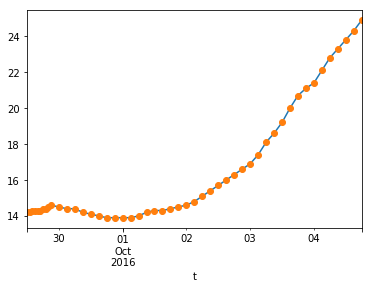

In [12]:
ax = tc_['lat'].interpolate(method='linear').plot()
tc_['lat'].plot(ax=ax, marker='o')

In [13]:
data = tc_.interpolate(method='cubic')

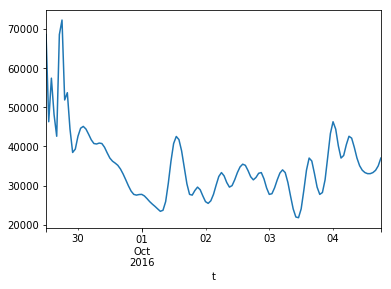

In [14]:
data['rmax'].plot()

# From lat lon to r, th

In [15]:
# required function
from math import radians, cos, sin, asin, sqrt
def Haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1 = np.radians([lon1, lat1])
    lon2, lat2 = np.radians([ lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6378.388 * c
    m = km * 1000
    return  m

In [16]:
def pres(r):
    return pn+dph*np.exp(-(rmaxh/r)**bh)

In [27]:
def hvel(r,dph,bh,rmaxh,kh):
    x=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    return (bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**x

In [72]:
def hvel2d(l1,l2,lon0,lat0):
    r = Haversine(l1, l2, lon0, lat0)
    xh=0.5+(r-rmaxh)/(maxR-rmaxh)*kh
    ur=(bh/rhoa*(rmaxh/r)**bh*dph*np.exp(-(rmaxh/r)**bh))**xh
    theta=np.arctan2((l2-lat0),(l1-lon0))
    ux=-ur*np.sin(theta)
    uy=ur*np.cos(theta)
    return ux+vtx*(1.-np.exp(-(rmaxh/r)**bh)),uy+vty*(1.-np.exp(-(rmaxh/r)**bh)), pres(r)

## for one time stamp

In [73]:
i=5

In [74]:
#define lat/lon window
minlon=tc.lon[i]-1.
maxlon=tc.lon[i]+1.
minlat=tc.lat[i]-1.
maxlat=tc.lat[i]+1.

In [75]:
lons=np.linspace(minlon, maxlon,100) # constract arrays
lats=np.linspace(minlat, maxlat,100)

In [76]:
q1,q2=np.meshgrid(lons,lats) # create grid

In [77]:
#compute u,v,p

In [78]:
bh,kh,dph,rmaxh,vtx,vty = tc.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]

In [79]:
zx,zy,pr=hvel2d(q1,q2,tc.lon[i],tc.lat[i])
vel=np.sqrt(zx**2+zy**2)

Plot 1D Holland function

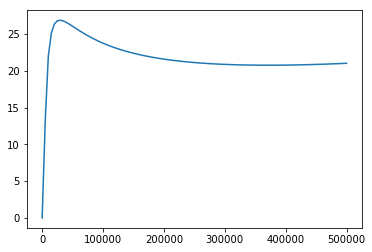

In [80]:
rh=np.linspace(0.01,maxR,100)
plt.plot(rh,hvel(rh,dph,bh,rmaxh,kh))

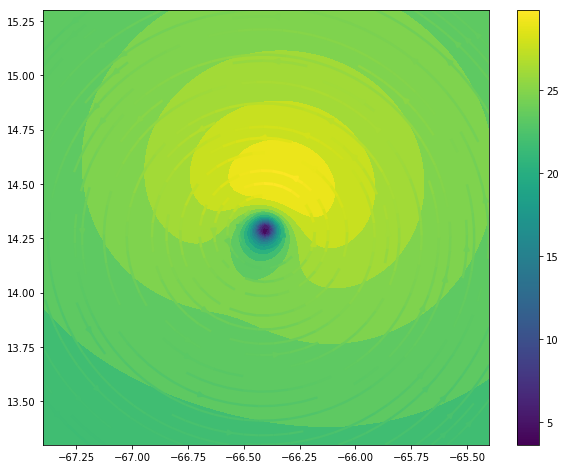

In [81]:
plt.figure(figsize=(10,8))
plt.contourf(q1,q2,vel,20)
plt.streamplot(q1,q2,zx,zy, color=vel, linewidth=0.1*vel)
plt.colorbar()
#plt.quiver(q1,q2,zx,zy,scale=700)


## compute for all time steps

In [165]:
#Define the big window
minlon=tc.lon.min()-1.
maxlon=tc.lon.max()+1.
minlat=tc.lat.min()-1.
maxlat=tc.lat.max()+1.

In [166]:
lons=np.linspace(minlon, maxlon,100) # constract arrays
lats=np.linspace(minlat, maxlat,100)

In [167]:
q1,q2=np.meshgrid(lons,lats) # create grid for the whole domain

In [168]:
ux=[]
uy=[]
pp=[]
for i in range(tc.shape[0]):
    bh,kh,dph,rmaxh,vtx,vty = tc.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]
    zx,zy,pr=hvel2d(q1,q2,tc.lon[i],tc.lat[i])
    ux.append(zx)
    uy.append(zy)
    pp.append(pr)

In [169]:
ux = np.array(ux)
uy = np.array(uy)
pp = np.array(pp)

In [170]:
vel=np.sqrt(ux**2+uy**2)

In [171]:
np.argwhere(vel==vel.max())

array([[41,  0, 99]])

In [172]:
np.amax(vel,axis=0)

array([[ 37.81996339,  37.77537687,  37.73703258, ...,  62.60596099,
         63.1844518 ,  63.77048305],
       [ 37.36871136,  37.32413686,  37.28580825, ...,  62.12420827,
         62.70143138,  63.28616737],
       [ 36.92417605,  36.87961058,  36.84129531, ...,  61.65060953,
         62.22658769,  62.81005134],
       ..., 
       [ 49.82824887,  49.52425271,  49.22383111, ...,  50.66101073,
         51.17720696,  51.69970665],
       [ 50.17867633,  49.87478748,  49.5744763 , ...,  50.89222537,
         51.40813173,  51.93034749],
       [ 50.53339691,  50.22960889,  49.92940165, ...,  51.13075296,
         51.6463796 ,  52.16832178]])

### Visualize

In [173]:
def v2d(i):
        fig, (a,b) = plt.subplots(1,2,figsize=(20,10),gridspec_kw = {'width_ratios':[1, 3]})
        i=int(i)
        c=b.contourf(q1,q2,vel[i,:,:],20)
  #      plt.streamplot(q1,q2,uy[i,:,:],uy[i,:,:], color=vel, linewidth=0.1*vel)
        cl = plt.colorbar(c)
        cl.set_label('Wind m/s', rotation=270)
        b.set_xlabel('lon')
        b.set_ylabel('lat')
        rh=np.linspace(0.01,maxR,100)
        bh,kh,dph,rmaxh,vtx,vty = tc.ix[i,['b','k','dph','rmaxh','vtrx','vtry']]
        a.plot(rh,hvel(rh,dph,bh,rmaxh,kh))
        a.set_ylabel('Max Wind m/s')
        a.set_xlabel('Radius m')
        plt.title(tc.ix[i].t)

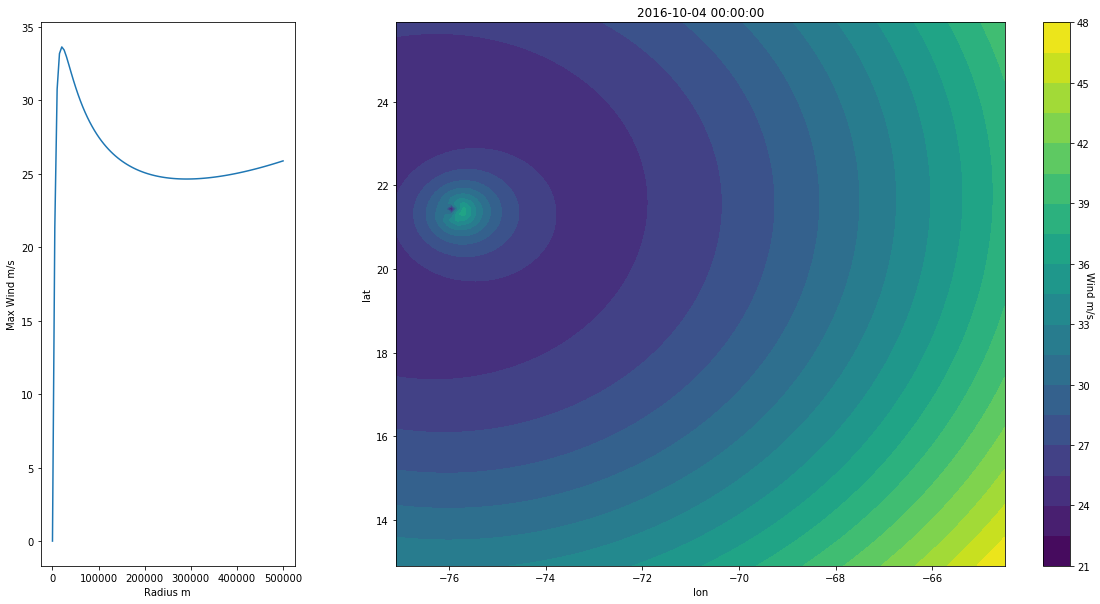

In [174]:
interact(v2d,i=widgets.IntSlider(min=0,max=ux.shape[0]-1,step=1,value=0))

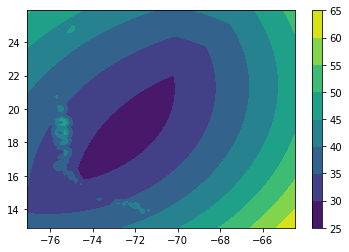

In [176]:
#print the wind swath
plt.contourf(q1,q2,np.amax(vel,axis=0))
plt.colorbar()

In [150]:
# we can now use pandas to interpolate every e.g. 5min
tc5 = tc.resample('5min').mean()

In [151]:
tc5.interpolate(method='linear')

,time,lat,lon,pcenter,penv,rmax,vmax,34ne,34nw,34se,...,w34sw,w34nw,vmax0vt,b,dph,k,np.max(V),rmaxh,rmse,vmax1
t,,,,,,,,,,,,,,,,,,,,,
2016-09-29 12:00:00,0.000000,14.200000,-65.500000,995.000000,-99.0,68524.000000,30.866667,279652.000000,270392.000000,98156.000000,...,19.534445,20.608431,26.161934,0.815796,2702.659386,0.119453,26.161934,22352.300001,2.989613,26.557689
2016-09-29 12:05:00,0.083333,14.200000,-65.516667,995.250000,-99.0,66672.000000,30.738056,280423.666667,271626.666667,98001.666667,...,19.511864,20.634053,26.153315,0.822091,2681.705253,0.123032,26.153315,22265.416458,2.960307,26.547642
2016-09-29 12:10:00,0.166667,14.200000,-65.533333,995.500000,-99.0,64820.000000,30.609444,281195.333333,272861.333333,97847.333333,...,19.489283,20.659675,26.144696,0.828386,2660.751120,0.126612,26.144696,22178.532914,2.931001,26.537595
2016-09-29 12:15:00,0.250000,14.200000,-65.550000,995.750000,-99.0,62968.000000,30.480833,281967.000000,274096.000000,97693.000000,...,19.466702,20.685296,26.136077,0.834680,2639.796987,0.130192,26.136077,22091.649370,2.901694,26.527548
2016-09-29 12:20:00,0.333333,14.200000,-65.566667,996.000000,-99.0,61116.000000,30.352222,282738.666667,275330.666667,97538.666667,...,19.444121,20.710918,26.127459,0.840975,2618.842854,0.133771,26.127459,22004.765826,2.872388,26.517501
2016-09-29 12:25:00,0.416667,14.200000,-65.583333,996.250000,-99.0,59264.000000,30.223611,283510.333333,276565.333333,97384.333333,...,19.421540,20.736540,26.118840,0.847270,2597.888721,0.137351,26.118840,21917.882282,2.843082,26.507454
2016-09-29 12:30:00,0.500000,14.200000,-65.600000,996.500000,-99.0,57412.000000,30.095000,284282.000000,277800.000000,97230.000000,...,19.398959,20.762162,26.110221,0.853565,2576.934588,0.140931,26.110221,21830.998738,2.813775,26.497407
2016-09-29 12:35:00,0.583333,14.200000,-65.616667,996.750000,-99.0,55560.000000,29.966389,285053.666667,279034.666667,97075.666667,...,19.376378,20.787784,26.101602,0.859860,2555.980455,0.144510,26.101602,21744.115194,2.784469,26.487360
2016-09-29 12:40:00,0.666667,14.200000,-65.633333,997.000000,-99.0,53708.000000,29.837778,285825.333333,280269.333333,96921.333333,...,19.353797,20.813406,26.092984,0.866154,2535.026322,0.148090,26.092984,21657.231650,2.755163,26.477313


## save u,v,p